---
Load Cancer Dataset

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt


cancer_ds = load_breast_cancer()
digits = load_digits()
data=cancer_ds

print("cancer.keys(): \n{}".format(cancer_ds.keys()))
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer_ds.target_names, np.bincount(cancer_ds.target))}))

# Información del Dataset
cancer_ds.DESCR
cancer_ds.feature_names

# Data Frame
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])
df['target'] = df['target'].astype('uint16')
df.head()

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Sample counts per class:
{'malignant': 212, 'benign': 357}


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Data Preprocessing
Let's remove unnecessary columns from the dataset.

In [2]:
#Espacio para preprocesamiento del dataset: eliminación de outliers, elimación datos faltantes,....

---
Particionar Data Set

In [3]:
from sklearn.model_selection import train_test_split

# Con Data Frame
#X = df.drop('target', axis=1)
#y = df[['target']]
# ó También sin Data Frame
#X= cancer_ds['data']
#y= cancer_ds['target']

X_train, X_test, y_train, y_test = train_test_split(cancer_ds['data'], cancer_ds['target'],
                  train_size=0.7, test_size=0.3, random_state=0, stratify=cancer_ds['target'], shuffle=True)
                  # El parámetro stratify asegura la partición balanceada

# X es una matriz, y es un vector
print("X_train shape: {}".format(X_train.shape))  
#print("y_train :", y_train)
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (398, 30)
y_train shape: (398,)
X_test shape: (171, 30)
y_test shape: (171,)


---
Decision Tree Classifier

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# test error


y_pred_train = shallow_tree.predict(X_train)
score1 = metrics.accuracy_score(y_train, y_pred_train)


y_pred_test = shallow_tree.predict(X_test)
score2 = metrics.accuracy_score(y_test, y_pred_test)

print(f"Accuracy Train:',{score1: .3f}, 'Accuracy Test',{score2: .3f}")


Accuracy Train:', 0.942, 'Accuracy Test', 0.906


___
AdaBoost Classifier
---

To calculate the accuracy of the AdaBoost models as we increase the number of trees from 1 to 60 with a step of 3 in the lines:


In [14]:
from sklearn.ensemble import AdaBoostClassifier
# adaboost with the tree as base 

estimators = list(range(1, 60, 3))  #increase the number of trees from 1 to 60 with a step of 3

abc_scores = []

for n_est in estimators:
    ABC = AdaBoostClassifier(estimator=shallow_tree, n_estimators = n_est)
    #ABC = AdaBoostClassifier(estimator=shallow_tree, learning_rate=1.0, 
    #                         n_estimators = n_est, algorithm='SAMME')
    
    ABC.fit(X_train, y_train)

    y_pred = ABC.predict(X_test)

    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

# Last AdaBoost Classifier Information 
print('Base estimator:',ABC.estimator_)
print('List of clssifiers:', ABC.estimators_)
print('Weights for each estimator:', ABC.estimator_weights_)
print('Classification error for each estimator:',ABC.estimator_errors_)
print('Number of features:',ABC.n_features_in_)

Base estimator: DecisionTreeClassifier(max_depth=2, random_state=100)
List of clssifiers: [DecisionTreeClassifier(max_depth=2, random_state=41340485), DecisionTreeClassifier(max_depth=2, random_state=1293496988), DecisionTreeClassifier(max_depth=2, random_state=1894875325), DecisionTreeClassifier(max_depth=2, random_state=1650222918), DecisionTreeClassifier(max_depth=2, random_state=1977884075), DecisionTreeClassifier(max_depth=2, random_state=839855729), DecisionTreeClassifier(max_depth=2, random_state=530020314), DecisionTreeClassifier(max_depth=2, random_state=971882286), DecisionTreeClassifier(max_depth=2, random_state=988671267), DecisionTreeClassifier(max_depth=2, random_state=459780395), DecisionTreeClassifier(max_depth=2, random_state=752632109), DecisionTreeClassifier(max_depth=2, random_state=1029964649), DecisionTreeClassifier(max_depth=2, random_state=410480770), DecisionTreeClassifier(max_depth=2, random_state=1383059503), DecisionTreeClassifier(max_depth=2, random_state=1

Plot test scores vs n_estimators

Adaboost Classif [0.9064327485380117, 0.9590643274853801, 0.9415204678362573, 0.935672514619883, 0.9239766081871345, 0.9122807017543859, 0.9415204678362573, 0.9298245614035088, 0.9415204678362573, 0.9298245614035088, 0.9415204678362573, 0.9415204678362573, 0.9532163742690059, 0.9415204678362573, 0.9532163742690059, 0.9590643274853801, 0.9590643274853801, 0.9590643274853801, 0.9590643274853801, 0.9415204678362573]


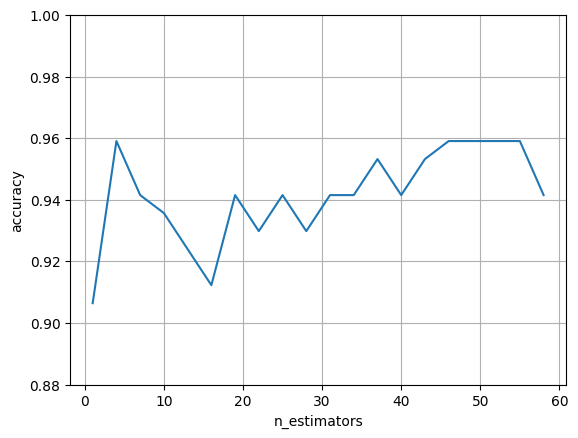

In [6]:
print('Adaboost Classif',abc_scores)
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.88, 1])
plt.grid()
plt.show()